# Normalization

Normalization plays a crucial role in deep learning, specifically when it comes to preprocessing the input data or normalizing the activations within the neural network layers. Normalization is performed to ensure that the input features or activations fall within a similar scale or range, which can help improve the training process and overall model performance. There are different techniques for normalization in deep learning, such as:

1) Input Normalization

2) Batch Normalization

3) Layer Normalization

# 1) Input Normalization:

Input normalization refers to scaling the input features to a common scale before feeding them into the neural network.
It helps in achieving faster convergence during training and prevents some features from dominating others due to differences in scale.
Common methods for input normalization include Min-Max scaling, Standardization (Z-score normalization), and Unit Norm normalization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Data/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
# Check for Null Values in all columns
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
# Drop 'Iser ID' column
df = df.iloc[:,1:]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [7]:
# Label Encode 'Gender' column
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

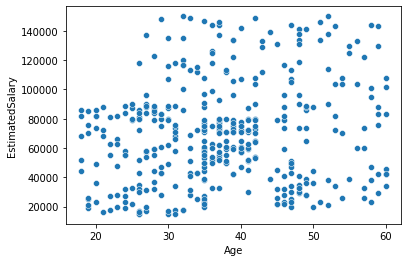

In [8]:
# Plot 'Age' vs 'EstimatedSalary'
sns.scatterplot(data=df, x='Age', y='EstimatedSalary')

In [9]:
# Split Dependent and Independent variables
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [10]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Build the model without Standardization

In [14]:
model1 = Sequential()
model1.add(Dense(128, activation = 'relu', input_dim=3))   # Use relu if sigmoid gives low accuracy
model1.add(Dense(1, activation='sigmoid'))

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [16]:
# loss = binary_crossentropy --> Binary Classification
#        SparseCategoricalCrossentropy  --> Multi Class Classification
#        MeanAbsoluteError  --> Regression
#        MeanAbsolutePercentageError --> Regression
#        MeanSquaredError  --> Regression
        
# optimizer = 'adam'


model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history1 = model1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200)

Epoch 1/200
10/10 [==============================] - 1s 20ms/step - loss: 3929.7812 - accuracy: 0.6531 - val_loss: 2657.6150 - val_accuracy: 0.6000
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 1041.7913 - accuracy: 0.5719 - val_loss: 682.5743 - val_accuracy: 0.4000
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 410.4669 - accuracy: 0.4406 - val_loss: 370.4288 - val_accuracy: 0.6000
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 204.9617 - accuracy: 0.5906 - val_loss: 296.1944 - val_accuracy: 0.4000
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 197.1591 - accuracy: 0.5344 - val_loss: 255.0384 - val_accuracy: 0.6000
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 106.1071 - accuracy: 0.5094 - val_loss: 97.0760 - val_accuracy: 0.6000
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 74.9078 - accuracy: 0.4969 - val_loss: 43.3909 - val_a

Epoch 58/200
10/10 [==============================] - 0s 4ms/step - loss: 97.7312 - accuracy: 0.5281 - val_loss: 26.7143 - val_accuracy: 0.6000
Epoch 59/200
10/10 [==============================] - 0s 4ms/step - loss: 40.8336 - accuracy: 0.5719 - val_loss: 14.6571 - val_accuracy: 0.6000
Epoch 60/200
10/10 [==============================] - 0s 4ms/step - loss: 23.0401 - accuracy: 0.5344 - val_loss: 79.7948 - val_accuracy: 0.6000
Epoch 61/200
10/10 [==============================] - 0s 4ms/step - loss: 51.0006 - accuracy: 0.5344 - val_loss: 23.2463 - val_accuracy: 0.4000
Epoch 62/200
10/10 [==============================] - 0s 4ms/step - loss: 25.9252 - accuracy: 0.4969 - val_loss: 54.7594 - val_accuracy: 0.4000
Epoch 63/200
10/10 [==============================] - 0s 4ms/step - loss: 62.8401 - accuracy: 0.5031 - val_loss: 118.3790 - val_accuracy: 0.4000
Epoch 64/200
10/10 [==============================] - 0s 4ms/step - loss: 48.5299 - accuracy: 0.5031 - val_loss: 74.0983 - val_accuracy

Epoch 115/200
10/10 [==============================] - 0s 4ms/step - loss: 49.0139 - accuracy: 0.5594 - val_loss: 14.4660 - val_accuracy: 0.6000
Epoch 116/200
10/10 [==============================] - 0s 4ms/step - loss: 25.6903 - accuracy: 0.5094 - val_loss: 58.3484 - val_accuracy: 0.4000
Epoch 117/200
10/10 [==============================] - 0s 4ms/step - loss: 48.6386 - accuracy: 0.4719 - val_loss: 46.4562 - val_accuracy: 0.6000
Epoch 118/200
10/10 [==============================] - 0s 4ms/step - loss: 46.3997 - accuracy: 0.5250 - val_loss: 57.6717 - val_accuracy: 0.4000
Epoch 119/200
10/10 [==============================] - 0s 4ms/step - loss: 32.0726 - accuracy: 0.5031 - val_loss: 64.0182 - val_accuracy: 0.4000
Epoch 120/200
10/10 [==============================] - 0s 4ms/step - loss: 50.9603 - accuracy: 0.4656 - val_loss: 12.2157 - val_accuracy: 0.4000
Epoch 121/200
10/10 [==============================] - 0s 4ms/step - loss: 14.6531 - accuracy: 0.5406 - val_loss: 31.2604 - val_ac

10/10 [==============================] - 0s 4ms/step - loss: 47.8280 - accuracy: 0.4469 - val_loss: 17.7287 - val_accuracy: 0.4000
Epoch 172/200
10/10 [==============================] - 0s 4ms/step - loss: 61.2888 - accuracy: 0.5719 - val_loss: 45.8206 - val_accuracy: 0.4000
Epoch 173/200
10/10 [==============================] - 0s 4ms/step - loss: 44.8240 - accuracy: 0.5312 - val_loss: 70.8705 - val_accuracy: 0.6000
Epoch 174/200
10/10 [==============================] - 0s 3ms/step - loss: 45.3205 - accuracy: 0.4594 - val_loss: 11.5304 - val_accuracy: 0.6000
Epoch 175/200
10/10 [==============================] - 0s 4ms/step - loss: 38.6063 - accuracy: 0.5094 - val_loss: 96.7131 - val_accuracy: 0.4000
Epoch 176/200
10/10 [==============================] - 0s 3ms/step - loss: 45.8983 - accuracy: 0.5594 - val_loss: 29.6305 - val_accuracy: 0.6000
Epoch 177/200
10/10 [==============================] - 0s 4ms/step - loss: 43.3027 - accuracy: 0.5531 - val_loss: 40.8022 - val_accuracy: 0.4000

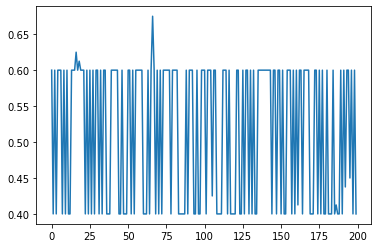

In [18]:
# Visualize the performance
plt.plot(history1.history['val_accuracy'])

# Build the model again but With Standardization

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [20]:
model2 = Sequential()
model2.add(Dense(128, activation = 'relu', input_dim=3))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 0.6625 - accuracy: 0.6250 - val_loss: 0.6413 - val_accuracy: 0.6875
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7344 - val_loss: 0.5929 - val_accuracy: 0.7000
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.7781 - val_loss: 0.5516 - val_accuracy: 0.7250
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5120 - accuracy: 0.7937 - val_loss: 0.5174 - val_accuracy: 0.7500
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.8156 - val_loss: 0.4884 - val_accuracy: 0.7625
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.8344 - val_loss: 0.4628 - val_accuracy: 0.8125
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.8344 - val_loss: 0.4426 - val_accuracy: 0.8000
Epoch 8/200


Epoch 59/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9250 - val_loss: 0.3526 - val_accuracy: 0.8375
Epoch 60/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9219 - val_loss: 0.3536 - val_accuracy: 0.8250
Epoch 61/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9219 - val_loss: 0.3533 - val_accuracy: 0.8375
Epoch 62/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9219 - val_loss: 0.3536 - val_accuracy: 0.8375
Epoch 63/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9219 - val_loss: 0.3528 - val_accuracy: 0.8375
Epoch 64/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9187 - val_loss: 0.3528 - val_accuracy: 0.8250
Epoch 65/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9219 - val_loss: 0.3544 - val_accuracy: 0.8250
Epoch 

10/10 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9281 - val_loss: 0.3713 - val_accuracy: 0.8375
Epoch 117/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1956 - accuracy: 0.9281 - val_loss: 0.3737 - val_accuracy: 0.8375
Epoch 118/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9281 - val_loss: 0.3726 - val_accuracy: 0.8375
Epoch 119/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9312 - val_loss: 0.3714 - val_accuracy: 0.8375
Epoch 120/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9281 - val_loss: 0.3708 - val_accuracy: 0.8375
Epoch 121/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9281 - val_loss: 0.3710 - val_accuracy: 0.8375
Epoch 122/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1947 - accuracy: 0.9250 - val_loss: 0.3730 - val_accuracy: 0.8375
Epoch 123/200

10/10 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.9281 - val_loss: 0.3721 - val_accuracy: 0.8500
Epoch 174/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9312 - val_loss: 0.3723 - val_accuracy: 0.8500
Epoch 175/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9312 - val_loss: 0.3709 - val_accuracy: 0.8500
Epoch 176/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9312 - val_loss: 0.3726 - val_accuracy: 0.8500
Epoch 177/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.9281 - val_loss: 0.3726 - val_accuracy: 0.8500
Epoch 178/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9281 - val_loss: 0.3728 - val_accuracy: 0.8500
Epoch 179/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9250 - val_loss: 0.3720 - val_accuracy: 0.8500
Epoch 180/200

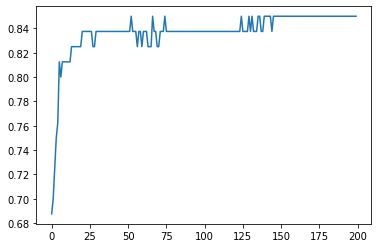

In [21]:
# Visualize the model performance
plt.plot(history2.history['val_accuracy'])

In [22]:
# Model gives stable and High accuracy after Standardization